# **07. Cat Dog Image Classifier using CNN and Data Augmentation**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



In [5]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score,ConfusionMatrixDisplay
from sklearn import datasets
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, optimizers, metrics, losses
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adadelta,Adagrad,Adamax,Nadam
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.utils import image_dataset_from_directory, plot_model, to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d moazeldsokyx/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/moazeldsokyx/dogs-vs-cats
License(s): CC0-1.0
 99% 805M/817M [00:07<00:00, 91.5MB/s]
100% 817M/817M [00:07<00:00, 112MB/s] 


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/validation'
test_dir = '/content/dataset/test'
train = image_dataset_from_directory(directory = train_dir,labels='inferred', label_mode='int', class_names=None,
                                     color_mode='rgb', batch_size=32, image_size=(256, 256),
                                     shuffle=True, seed=None, validation_split=None, subset=None,
                                     interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False,
                                     pad_to_aspect_ratio=False, data_format=None, verbose=True)
val = image_dataset_from_directory(directory = val_dir,labels='inferred', label_mode='int', class_names=None,
                                     color_mode='rgb', batch_size=32, image_size=(256, 256),
                                     shuffle=True, seed=None, validation_split=None, subset=None,
                                     interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False,
                                     pad_to_aspect_ratio=False, data_format=None, verbose=True)
test = image_dataset_from_directory(directory = test_dir,labels='inferred', label_mode='int', class_names=None,
                                     color_mode='rgb', batch_size=32, image_size=(256, 256),
                                     shuffle=True, seed=None, validation_split=None, subset=None,
                                     interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False,
                                     pad_to_aspect_ratio=False, data_format=None, verbose=True)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 12461 files belonging to 2 classes.


In [10]:
data_gen_train = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.5,
    height_shift_range=0.5,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip= True,
    vertical_flip=False,
    rescale= 1/255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
    )

data_gen_val_test = ImageDataGenerator(
    rescale= 1/255
    )


In [11]:
train_dataset = data_gen_train.flow_from_directory(train_dir,target_size=(256,256),batch_size=32,class_mode='binary')
val_dataset = data_gen_val_test.flow_from_directory(val_dir,target_size=(256,256),batch_size=32,class_mode='binary')
test_dataset = data_gen_val_test.flow_from_directory(test_dir,target_size=(256,256),batch_size=32,class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12461 images belonging to 2 classes.


In [12]:
model3 = Sequential()

model3.add(Conv2D(filters = 32,kernel_size=(3,3),
                  padding='same',activation = 'relu',input_shape = (256,256,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model3.add(Conv2D(filters = 32,kernel_size=(3,3),
                  padding='same',strides = (1,1),activation = 'relu',
                  input_dim = (256,256,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model3.add(Conv2D(filters = 32,kernel_size=(3,3),
                  padding='same',strides = (1,1),activation = 'relu',
                  input_dim = (256,256,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model3.add(Flatten())

model3.add(Dense(units = 128, activation='relu',kernel_initializer= 'he_normal'))
model3.add(Dropout(0.1))
model3.add(Dense(units = 64, activation='relu',kernel_initializer= 'he_normal'))
model3.add(Dropout(0.1))
model3.add(Dense(units = 1, activation='sigmoid',kernel_initializer= 'glorot_normal'))

In [13]:
model3.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [15]:
call_back = EarlyStopping(monitor = 'val_accuracy',min_delta = 0.01, patience = 2,mode = 'auto', restore_best_weights=True)

In [17]:
history3  = model3.fit(train_dataset,epochs = 100,validation_data = val_dataset,callbacks = [call_back])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 362s 572ms/step - accuracy: 0.5404 - loss: 0.8974 - val_accuracy: 0.5888 - val_loss: 0.6529
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 347s 549ms/step - accuracy: 0.6024 - loss: 0.6603 - val_accuracy: 0.6360 - val_loss: 0.6317
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 340s 537ms/step - accuracy: 0.6092 - loss: 0.6450 - val_accuracy: 0.6498 - val_loss: 0.6233
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 345s 547ms/step - accuracy: 0.6205 - loss: 0.6379 - val_accuracy: 0.5590 - val_loss: 0.6643
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 375s 535ms/step - accuracy: 0.6255 - loss: 0.6347 - val_accuracy: 0.5890 - val_loss: 0.6587


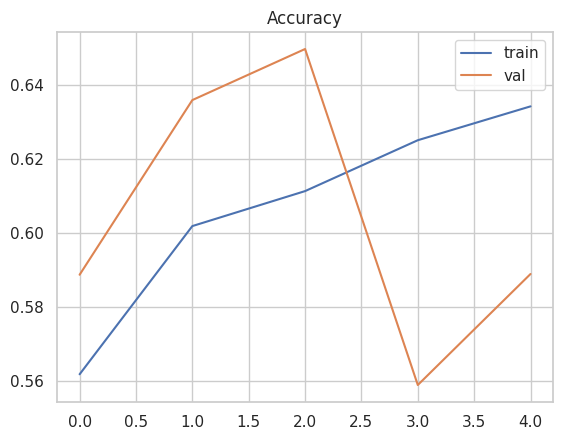

In [18]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.legend(['train','val'])
plt.title('Accuracy')
plt.show()

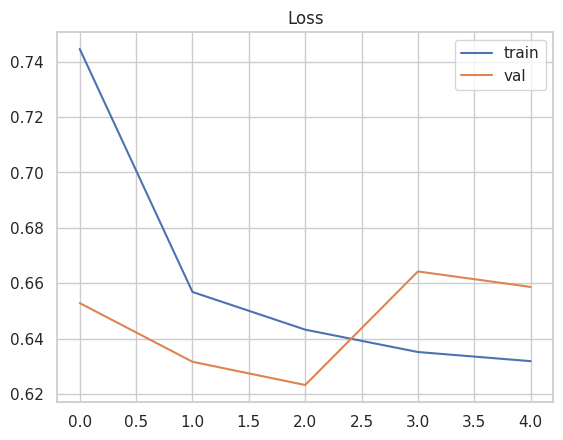

In [19]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['train','val'])
plt.title('Loss')
plt.show()